In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

import statsmodels.formula.api as smf

In [ ]:
df = pd.read_excel("house.xlsx")
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,Gd,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,TA,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,Gd,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,TA,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,Gd,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
df = pd.get_dummies(df)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SalePrice,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,208500,False,False,True,False,False,False,False,False,True
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,181500,False,False,False,True,False,False,False,False,True
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,223500,False,False,True,False,False,False,False,False,True
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,140000,False,False,False,True,False,False,False,False,True
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,250000,False,False,True,False,False,False,False,False,True


In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1121 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1121 non-null   int64  
 1   MSSubClass     1121 non-null   int64  
 2   LotFrontage    1121 non-null   float64
 3   LotArea        1121 non-null   int64  
 4   OverallQual    1121 non-null   int64  
 5   OverallCond    1121 non-null   int64  
 6   YearBuilt      1121 non-null   int64  
 7   YearRemodAdd   1121 non-null   int64  
 8   MasVnrArea     1121 non-null   float64
 9   BsmtFinSF1     1121 non-null   int64  
 10  BsmtFinSF2     1121 non-null   int64  
 11  BsmtUnfSF      1121 non-null   int64  
 12  TotalBsmtSF    1121 non-null   int64  
 13  1stFlrSF       1121 non-null   int64  
 14  2ndFlrSF       1121 non-null   int64  
 15  LowQualFinSF   1121 non-null   int64  
 16  GrLivArea      1121 non-null   int64  
 17  BsmtFullBath   1121 non-null   int64  
 18  BsmtHalfBath 

In [ ]:
scaler = MinMaxScaler()


df_norm = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

df_norm.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SalePrice,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,...,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.0,1121.000000
mean,0.497493,0.212625,0.170087,0.041239,0.526539,0.508729,0.709730,0.594722,0.067805,0.077675,...,0.208695,0.041035,0.006244,0.355040,0.597681,0.001784,0.015165,0.092774,0.0,0.890277
std,0.288395,0.245722,0.083106,0.037997,0.172603,0.152605,0.238213,0.350433,0.118438,0.082988,...,0.115326,0.198459,0.078810,0.478739,0.490585,0.042220,0.122264,0.290245,0.0,0.312684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.248801,0.000000,0.133562,0.029400,0.375000,0.428571,0.561538,0.266667,0.000000,0.000000,...,0.132959,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
50%,0.496230,0.176471,0.167808,0.037935,0.500000,0.428571,0.723077,0.750000,0.000000,0.066265,...,0.180062,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,0.747087,0.294118,0.202055,0.047026,0.625000,0.571429,0.946154,0.916667,0.106250,0.124380,...,0.255929,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


<Axes: xlabel='SalePrice', ylabel='Count'>

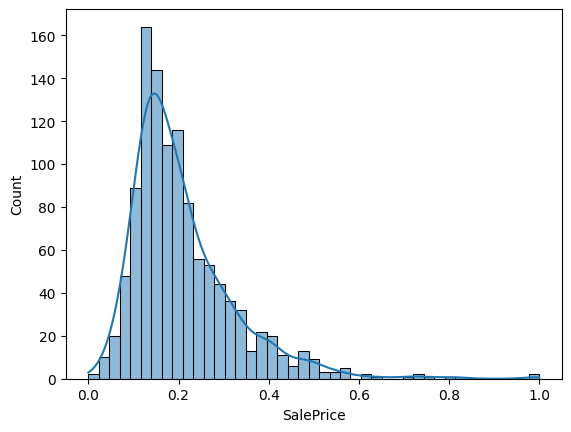

In [ ]:
sns.histplot(data=df_norm, x="SalePrice", kde=True)

In [ ]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1121 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1121 non-null   float64
 1   MSSubClass     1121 non-null   float64
 2   LotFrontage    1121 non-null   float64
 3   LotArea        1121 non-null   float64
 4   OverallQual    1121 non-null   float64
 5   OverallCond    1121 non-null   float64
 6   YearBuilt      1121 non-null   float64
 7   YearRemodAdd   1121 non-null   float64
 8   MasVnrArea     1121 non-null   float64
 9   BsmtFinSF1     1121 non-null   float64
 10  BsmtFinSF2     1121 non-null   float64
 11  BsmtUnfSF      1121 non-null   float64
 12  TotalBsmtSF    1121 non-null   float64
 13  1stFlrSF       1121 non-null   float64
 14  2ndFlrSF       1121 non-null   float64
 15  LowQualFinSF   1121 non-null   float64
 16  GrLivArea      1121 non-null   float64
 17  BsmtFullBath   1121 non-null   float64
 18  BsmtHalfBath 

In [ ]:
df_norm = df_norm.rename(columns={'2ndFlrSF': 'SecondFlrSF', '1stFlrSF':'FirstFlrSF', '3SsnPorch':'ThreeSsnPorch'})
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1121 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1121 non-null   float64
 1   MSSubClass     1121 non-null   float64
 2   LotFrontage    1121 non-null   float64
 3   LotArea        1121 non-null   float64
 4   OverallQual    1121 non-null   float64
 5   OverallCond    1121 non-null   float64
 6   YearBuilt      1121 non-null   float64
 7   YearRemodAdd   1121 non-null   float64
 8   MasVnrArea     1121 non-null   float64
 9   BsmtFinSF1     1121 non-null   float64
 10  BsmtFinSF2     1121 non-null   float64
 11  BsmtUnfSF      1121 non-null   float64
 12  TotalBsmtSF    1121 non-null   float64
 13  FirstFlrSF     1121 non-null   float64
 14  SecondFlrSF    1121 non-null   float64
 15  LowQualFinSF   1121 non-null   float64
 16  GrLivArea      1121 non-null   float64
 17  BsmtFullBath   1121 non-null   float64
 18  BsmtHalfBath 

Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, ExterQual_Ex, ExterQual_Fa, ExterQual_Gd, ExterQual_TA, ExterCond_Ex, ExterCond_Fa, ExterCond_Gd, ExterCond_Po, ExterCond_TA

In [ ]:
#modelo MRLS
function = 'SalePrice~Id+MSSubClass+LotFrontage+LotArea+OverallQual+OverallCond+YearBuilt+YearRemodAdd+MasVnrArea+BsmtFinSF1+BsmtFinSF2+BsmtUnfSF+TotalBsmtSF+FirstFlrSF+SecondFlrSF+LowQualFinSF+GrLivArea+BsmtFullBath+BsmtHalfBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageYrBlt+GarageCars+GarageArea+WoodDeckSF+OpenPorchSF+EnclosedPorch+ThreeSsnPorch+ScreenPorch+PoolArea+MiscVal+MoSold+YrSold+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA+ExterCond_Ex+ExterCond_Fa+ExterCond_Gd+ExterCond_Po+ExterCond_TA'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     120.9
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:36:11   Log-Likelihood:                 1796.3
No. Observations:                1121   AIC:                            -3509.
Df Residuals:                    1079   BIC:                            -3298.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0283      0.013     -2.220

In [ ]:
#modelo MRLS
function = 'SalePrice~Id+MSSubClass+LotFrontage+LotArea+OverallQual+OverallCond+YearBuilt+YearRemodAdd+MasVnrArea+BsmtFinSF1+BsmtFinSF2+BsmtUnfSF+TotalBsmtSF+FirstFlrSF+SecondFlrSF+LowQualFinSF+GrLivArea+BsmtFullBath+BsmtHalfBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageYrBlt+GarageCars+GarageArea+WoodDeckSF+OpenPorchSF+ThreeSsnPorch+ScreenPorch+PoolArea+MiscVal+MoSold+YrSold+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA+ExterCond_Ex+ExterCond_Fa+ExterCond_Gd+ExterCond_Po+ExterCond_TA'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     124.0
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:36:58   Log-Likelihood:                 1796.2
No. Observations:                1121   AIC:                            -3510.
Df Residuals:                    1080   BIC:                            -3305.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.511e+10   8.23e+10     -0.548

In [ ]:
#modelo MRLS
function = 'SalePrice~Id+MSSubClass+LotFrontage+LotArea+OverallQual+OverallCond+YearBuilt+YearRemodAdd+MasVnrArea+BsmtFinSF1+BsmtFinSF2+BsmtUnfSF+TotalBsmtSF+FirstFlrSF+SecondFlrSF+LowQualFinSF+GrLivArea+BsmtFullBath+BsmtHalfBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageYrBlt+GarageCars+WoodDeckSF+OpenPorchSF+ThreeSsnPorch+ScreenPorch+PoolArea+MiscVal+MoSold+YrSold+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA+ExterCond_Ex+ExterCond_Fa+ExterCond_Gd+ExterCond_Po+ExterCond_TA'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     127.3
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:37:31   Log-Likelihood:                 1796.0
No. Observations:                1121   AIC:                            -3512.
Df Residuals:                    1081   BIC:                            -3311.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.455e+10   8.23e+10     -0.420

In [ ]:
#modelo MRLS
function = 'SalePrice~Id+MSSubClass+LotFrontage+LotArea+OverallQual+OverallCond+YearBuilt+YearRemodAdd+MasVnrArea+BsmtFinSF1+BsmtFinSF2+BsmtUnfSF+TotalBsmtSF+FirstFlrSF+SecondFlrSF+LowQualFinSF+GrLivArea+BsmtFullBath+BsmtHalfBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageYrBlt+GarageCars+WoodDeckSF+OpenPorchSF+ThreeSsnPorch+ScreenPorch+PoolArea+MiscVal+MoSold+YrSold+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA+ExterCond_Ex+ExterCond_Fa+ExterCond_Gd+ExterCond_Po+ExterCond_TA'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     130.8
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:37:51   Log-Likelihood:                 1796.2
No. Observations:                1121   AIC:                            -3514.
Df Residuals:                    1082   BIC:                            -3319.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0273      0.012     -2.205

In [ ]:
#modelo MRLS
function = 'SalePrice~Id+MSSubClass+LotFrontage+LotArea+OverallQual+OverallCond+YearBuilt+YearRemodAdd+MasVnrArea+BsmtFinSF1+BsmtUnfSF+TotalBsmtSF+FirstFlrSF+SecondFlrSF+LowQualFinSF+GrLivArea+BsmtFullBath+BsmtHalfBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageYrBlt+GarageCars+WoodDeckSF+OpenPorchSF+ThreeSsnPorch+ScreenPorch+PoolArea+MiscVal+MoSold+YrSold+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA+ExterCond_Ex+ExterCond_Fa+ExterCond_Gd+ExterCond_Po+ExterCond_TA'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     130.8
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:38:39   Log-Likelihood:                 1796.2
No. Observations:                1121   AIC:                            -3514.
Df Residuals:                    1082   BIC:                            -3319.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0273      0.012     -2.205

In [ ]:
#modelo MRLS
function = 'SalePrice~Id+MSSubClass+LotFrontage+LotArea+OverallQual+OverallCond+YearBuilt+YearRemodAdd+MasVnrArea+BsmtFinSF1+BsmtUnfSF+TotalBsmtSF+FirstFlrSF+SecondFlrSF+LowQualFinSF+GrLivArea+BsmtFullBath+BsmtHalfBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageYrBlt+GarageCars+WoodDeckSF+OpenPorchSF+ThreeSsnPorch+ScreenPorch+PoolArea+MiscVal+MoSold+YrSold+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA+ExterCond_Ex+ExterCond_Fa+ExterCond_Po+ExterCond_TA'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     130.8
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:39:10   Log-Likelihood:                 1796.2
No. Observations:                1121   AIC:                            -3514.
Df Residuals:                    1082   BIC:                            -3319.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0292      0.014     -2.134

In [ ]:
#modelo MRLS
function = 'SalePrice~Id+MSSubClass+LotFrontage+OverallQual+OverallCond+YearBuilt+YearRemodAdd+MasVnrArea+BsmtFinSF1+BsmtUnfSF+TotalBsmtSF+FirstFlrSF+SecondFlrSF+LowQualFinSF+GrLivArea+BsmtFullBath+BsmtHalfBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageYrBlt+GarageCars+WoodDeckSF+OpenPorchSF+ThreeSsnPorch+ScreenPorch+PoolArea+MiscVal+MoSold+YrSold+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA+ExterCond_Ex+ExterCond_Fa+ExterCond_Po+ExterCond_TA'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     132.5
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:39:36   Log-Likelihood:                 1789.5
No. Observations:                1121   AIC:                            -3503.
Df Residuals:                    1083   BIC:                            -3312.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0283      0.014     -2.056

In [ ]:
#modelo MRLS
function = 'SalePrice~Id+MSSubClass+LotFrontage+OverallQual+OverallCond+YearBuilt+YearRemodAdd+MasVnrArea+BsmtFinSF1+BsmtUnfSF+TotalBsmtSF+FirstFlrSF+SecondFlrSF+GrLivArea+BsmtFullBath+BsmtHalfBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageYrBlt+GarageCars+WoodDeckSF+OpenPorchSF+ThreeSsnPorch+ScreenPorch+PoolArea+MiscVal+MoSold+YrSold+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA+ExterCond_Ex+ExterCond_Fa+ExterCond_Po+ExterCond_TA'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     132.5
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:40:16   Log-Likelihood:                 1789.5
No. Observations:                1121   AIC:                            -3503.
Df Residuals:                    1083   BIC:                            -3312.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0283      0.014     -2.056

In [ ]:
#modelo MRLS
function = 'SalePrice~Id+MSSubClass+LotFrontage+OverallQual+OverallCond+YearBuilt+YearRemodAdd+MasVnrArea+BsmtFinSF1+BsmtUnfSF+TotalBsmtSF+SecondFlrSF+GrLivArea+BsmtFullBath+BsmtHalfBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageYrBlt+GarageCars+WoodDeckSF+OpenPorchSF+ThreeSsnPorch+ScreenPorch+PoolArea+MiscVal+MoSold+YrSold+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA+ExterCond_Ex+ExterCond_Fa+ExterCond_Po+ExterCond_TA'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     136.3
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:40:42   Log-Likelihood:                 1789.4
No. Observations:                1121   AIC:                            -3505.
Df Residuals:                    1084   BIC:                            -3319.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0287      0.014     -2.092

In [ ]:
#modelo MRLS
function = 'SalePrice~Id+MSSubClass+LotFrontage+OverallQual+OverallCond+YearBuilt+YearRemodAdd+MasVnrArea+BsmtFinSF1+BsmtUnfSF+TotalBsmtSF+GrLivArea+BsmtFullBath+BsmtHalfBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageYrBlt+GarageCars+WoodDeckSF+OpenPorchSF+ThreeSsnPorch+ScreenPorch+PoolArea+MiscVal+MoSold+YrSold+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA+ExterCond_Ex+ExterCond_Fa+ExterCond_Po+ExterCond_TA'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     140.3
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:41:05   Log-Likelihood:                 1789.3
No. Observations:                1121   AIC:                            -3507.
Df Residuals:                    1085   BIC:                            -3326.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0288      0.014     -2.094

In [ ]:
#modelo MRLS
function = 'SalePrice~Id+MSSubClass+LotFrontage+OverallQual+OverallCond+YearBuilt+YearRemodAdd+MasVnrArea+BsmtFinSF1+BsmtUnfSF+TotalBsmtSF+GrLivArea+BsmtFullBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageYrBlt+GarageCars+WoodDeckSF+OpenPorchSF+ThreeSsnPorch+ScreenPorch+PoolArea+MiscVal+MoSold+YrSold+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA+ExterCond_Ex+ExterCond_Fa+ExterCond_Po+ExterCond_TA'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     144.5
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:41:44   Log-Likelihood:                 1789.2
No. Observations:                1121   AIC:                            -3508.
Df Residuals:                    1086   BIC:                            -3333.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0286      0.014     -2.086

In [ ]:
#modelo MRLS
function = 'SalePrice~Id+MSSubClass+LotFrontage+OverallQual+OverallCond+YearBuilt+YearRemodAdd+MasVnrArea+BsmtFinSF1+BsmtUnfSF+TotalBsmtSF+GrLivArea+BsmtFullBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageYrBlt+GarageCars+WoodDeckSF+OpenPorchSF+ThreeSsnPorch+ScreenPorch+PoolArea+MiscVal+YrSold+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA+ExterCond_Ex+ExterCond_Fa+ExterCond_Po+ExterCond_TA'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     149.0
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:42:06   Log-Likelihood:                 1789.0
No. Observations:                1121   AIC:                            -3510.
Df Residuals:                    1087   BIC:                            -3339.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0300      0.013     -2.235

In [ ]:
#modelo MRLS
function = 'SalePrice~Id+MSSubClass+LotFrontage+OverallQual+OverallCond+YearBuilt+YearRemodAdd+MasVnrArea+BsmtUnfSF+TotalBsmtSF+GrLivArea+BsmtFullBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageYrBlt+GarageCars+WoodDeckSF+OpenPorchSF+ThreeSsnPorch+ScreenPorch+PoolArea+MiscVal+YrSold+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA+ExterCond_Ex+ExterCond_Fa+ExterCond_Po+ExterCond_TA'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     153.7
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:42:24   Log-Likelihood:                 1788.8
No. Observations:                1121   AIC:                            -3512.
Df Residuals:                    1088   BIC:                            -3346.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0302      0.013     -2.250

In [ ]:
#modelo MRLS
function = 'SalePrice~Id+MSSubClass+LotFrontage+OverallQual+OverallCond+YearBuilt+YearRemodAdd+MasVnrArea+BsmtUnfSF+TotalBsmtSF+GrLivArea+BsmtFullBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageYrBlt+GarageCars+WoodDeckSF+OpenPorchSF+ScreenPorch+PoolArea+MiscVal+YrSold+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA+ExterCond_Ex+ExterCond_Fa+ExterCond_Po+ExterCond_TA'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     158.7
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:42:47   Log-Likelihood:                 1788.6
No. Observations:                1121   AIC:                            -3513.
Df Residuals:                    1089   BIC:                            -3353.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0301      0.013     -2.245   

In [ ]:
#modelo MRLS
function = 'SalePrice~Id+MSSubClass+LotFrontage+OverallQual+OverallCond+YearBuilt+MasVnrArea+BsmtUnfSF+TotalBsmtSF+GrLivArea+BsmtFullBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageYrBlt+GarageCars+WoodDeckSF+OpenPorchSF+ScreenPorch+PoolArea+MiscVal+YrSold+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA+ExterCond_Ex+ExterCond_Fa+ExterCond_Po+ExterCond_TA'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     164.1
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:43:02   Log-Likelihood:                 1788.4
No. Observations:                1121   AIC:                            -3515.
Df Residuals:                    1090   BIC:                            -3359.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0320      0.013     -2.439   

In [ ]:
#modelo MRLS
function = 'SalePrice~Id+MSSubClass+LotFrontage+OverallQual+OverallCond+YearBuilt+MasVnrArea+BsmtUnfSF+TotalBsmtSF+GrLivArea+BsmtFullBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageCars+WoodDeckSF+OpenPorchSF+ScreenPorch+PoolArea+MiscVal+YrSold+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA+ExterCond_Ex+ExterCond_Fa+ExterCond_Po+ExterCond_TA'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     169.8
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:43:26   Log-Likelihood:                 1788.2
No. Observations:                1121   AIC:                            -3516.
Df Residuals:                    1091   BIC:                            -3366.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0333      0.013     -2.579   

In [ ]:
#modelo MRLS
function = 'SalePrice~Id+MSSubClass+LotFrontage+OverallQual+OverallCond+YearBuilt+MasVnrArea+BsmtUnfSF+TotalBsmtSF+GrLivArea+BsmtFullBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageCars+WoodDeckSF+ScreenPorch+PoolArea+MiscVal+YrSold+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA+ExterCond_Ex+ExterCond_Fa+ExterCond_Po+ExterCond_TA'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     176.0
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:43:47   Log-Likelihood:                 1787.9
No. Observations:                1121   AIC:                            -3518.
Df Residuals:                    1092   BIC:                            -3372.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0333      0.013     -2.582   

In [ ]:
#modelo MRLS
function = 'SalePrice~MSSubClass+LotFrontage+OverallQual+OverallCond+YearBuilt+MasVnrArea+BsmtUnfSF+TotalBsmtSF+GrLivArea+BsmtFullBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageCars+WoodDeckSF+ScreenPorch+PoolArea+MiscVal+YrSold+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA+ExterCond_Ex+ExterCond_Fa+ExterCond_Po+ExterCond_TA'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     182.5
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:44:04   Log-Likelihood:                 1787.5
No. Observations:                1121   AIC:                            -3519.
Df Residuals:                    1093   BIC:                            -3378.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0354      0.013     -2.785   

In [ ]:
#modelo MRLS
function = 'SalePrice~MSSubClass+LotFrontage+OverallQual+OverallCond+YearBuilt+MasVnrArea+BsmtUnfSF+TotalBsmtSF+GrLivArea+BsmtFullBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageCars+WoodDeckSF+ScreenPorch+PoolArea+MiscVal+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA+ExterCond_Ex+ExterCond_Fa+ExterCond_Po+ExterCond_TA'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     189.5
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:44:21   Log-Likelihood:                 1787.1
No. Observations:                1121   AIC:                            -3520.
Df Residuals:                    1094   BIC:                            -3385.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0368      0.013     -2.914   

In [ ]:
#modelo MRLS
function = 'SalePrice~MSSubClass+OverallQual+OverallCond+YearBuilt+MasVnrArea+BsmtUnfSF+TotalBsmtSF+GrLivArea+BsmtFullBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageCars+WoodDeckSF+ScreenPorch+PoolArea+MiscVal+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA+ExterCond_Ex+ExterCond_Fa+ExterCond_Po+ExterCond_TA'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     197.0
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:44:35   Log-Likelihood:                 1786.6
No. Observations:                1121   AIC:                            -3521.
Df Residuals:                    1095   BIC:                            -3391.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0384      0.013     -3.068   

In [ ]:
#modelo MRLS
function = 'SalePrice~MSSubClass+OverallQual+OverallCond+YearBuilt+MasVnrArea+BsmtUnfSF+TotalBsmtSF+GrLivArea+BsmtFullBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageCars+WoodDeckSF+ScreenPorch+PoolArea+MiscVal+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA+ExterCond_Fa+ExterCond_Po+ExterCond_TA'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     205.2
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:44:57   Log-Likelihood:                 1786.0
No. Observations:                1121   AIC:                            -3522.
Df Residuals:                    1096   BIC:                            -3396.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0385      0.013     -3.080   

In [ ]:
#modelo MRLS
function = 'SalePrice~MSSubClass+OverallQual+OverallCond+YearBuilt+MasVnrArea+BsmtUnfSF+TotalBsmtSF+GrLivArea+BsmtFullBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageCars+WoodDeckSF+ScreenPorch+PoolArea+MiscVal+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA+ExterCond_Fa+ExterCond_Po'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     214.1
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:45:09   Log-Likelihood:                 1785.5
No. Observations:                1121   AIC:                            -3523.
Df Residuals:                    1097   BIC:                            -3403.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0337      0.011     -2.943   

In [ ]:
#modelo MRLS
function = 'SalePrice~MSSubClass+OverallQual+OverallCond+YearBuilt+MasVnrArea+BsmtUnfSF+TotalBsmtSF+GrLivArea+BsmtFullBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageCars+WoodDeckSF+ScreenPorch+PoolArea+MiscVal+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA+ExterCond_Po'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     223.8
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:45:25   Log-Likelihood:                 1785.2
No. Observations:                1121   AIC:                            -3524.
Df Residuals:                    1098   BIC:                            -3409.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0321      0.011     -2.842   

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [ ]:
#modelo MRLS
function = 'SalePrice~MSSubClass+OverallQual+OverallCond+YearBuilt+MasVnrArea+BsmtUnfSF+TotalBsmtSF+GrLivArea+BsmtFullBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageCars+WoodDeckSF+ScreenPorch+PoolArea+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA+ExterCond_Po'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     234.3
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:45:38   Log-Likelihood:                 1784.4
No. Observations:                1121   AIC:                            -3525.
Df Residuals:                    1099   BIC:                            -3414.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0326      0.011     -2.887   

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [ ]:
#modelo MRLS
function = 'SalePrice~MSSubClass+OverallQual+OverallCond+YearBuilt+MasVnrArea+BsmtUnfSF+TotalBsmtSF+GrLivArea+BsmtFullBath+FullBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageCars+WoodDeckSF+ScreenPorch+PoolArea+ExterQual_Ex+ExterQual_Fa+ExterQual_Gd+ExterQual_TA'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     234.3
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:45:48   Log-Likelihood:                 1784.4
No. Observations:                1121   AIC:                            -3525.
Df Residuals:                    1099   BIC:                            -3414.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0326      0.011     -2.887   

In [ ]:
y = np.array(df_norm["SalePrice"])
x = df_norm[['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA']]

x_list = list(df[['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA']].columns)
x = np.array(x)

#Separando os dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
grb = GradientBoostingRegressor(n_estimators=100)
grb.fit(x_train, y_train)
gbr_pred = grb.predict(x_test)

In [ ]:
# Calculate the absolute errors
errors_gbr = abs(gbr_pred - y_test)

# Print out the mean absolute error (mae)
r_sq = grb.score(x_test, y_test)
print('Coeficiente de Determinação (R²):', r_sq)

print('MAE:', metrics.mean_absolute_error(y_test, gbr_pred))
print('MSE:', metrics.mean_squared_error(y_test, gbr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbr_pred)))

Coeficiente de Determinação (R²): 0.8848455665041633
MAE: 0.026606185655051167
MSE: 0.001753559265389684
RMSE: 0.04187552107603778


In [ ]:
parameters = {'learning_rate': [0.03, 0.04, 0.05, 0.06],
                  'subsample'    : [0.2, 0.3, 0.4],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [8, 10]
                 }

grid_search = GridSearchCV(grb, parameters, scoring='r2', cv=2, n_jobs=-1)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.03, 0.04, 0.05, 0.06],
                         'max_depth': [8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.2, 0.3, 0.4]},
             scoring='r2')

In [ ]:
    print(" Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n",grid_search.best_estimator_)
    print("\n The best score across ALL searched params:\n",grid_search.best_score_)
    print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.04, max_depth=8, subsample=0.2)

 The best score across ALL searched params:
 0.8512840038332499

 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.2}


In [ ]:
best_model = grid_search.best_estimator_

best_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.03,
 'loss': 'squared_error',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 0.2,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
grb_tunned = GradientBoostingRegressor(alpha = 0.9,
 ccp_alpha = 0.0,
 criterion = 'friedman_mse',
 init = None,
 learning_rate = 0.06,
 loss = 'squared_error',
 max_depth = 10,
 max_features = None,
 max_leaf_nodes = None,
 min_impurity_decrease = 0.0,
 min_samples_leaf = 1,
 min_samples_split = 2,
 min_weight_fraction_leaf = 0.0,
 n_estimators = 100,
 n_iter_no_change = None,
 random_state = None,
 subsample = 0.2,
 tol = 0.0001,
 validation_fraction = 0.1,
 verbose = 0,
 warm_start = False)

grb_tunned.fit(x_train, y_train)
gbr_tunned_pred = grb_tunned.predict(x_test)

# Calculate the absolute errors
errors_gbr = abs(gbr_tunned_pred - y_test)

# Print out the mean absolute error (mae)
r_sq = grb_tunned.score(x_test, y_test)
print('Coeficiente de Determinação (R²):', r_sq)

print('MAE:', metrics.mean_absolute_error(y_test, gbr_tunned_pred))
print('MSE:', metrics.mean_squared_error(y_test, gbr_tunned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbr_tunned_pred)))

Coeficiente de Determinação (R²): 0.8954036934601842
MAE: 0.025240879386470662
MSE: 0.0015927812494085584
RMSE: 0.03990966360931345
